### AUTHORS:- Dama, Ruchik Rohit (rdama) and Nidadavolu,Sri Satya Sai Pavan (srnida) 

### Applied Machine Learning Homework 4 Part 2 

### Importing libraries

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn.decomposition import PCA

### Getting MNIST Dataset

In [2]:
mnist=fetch_openml("mnist_784",version=1)

In [3]:
X,y=mnist["data"],mnist["target"]

In [4]:
y=y.astype(int)
X=((X/255.)-.5)*2
print(X.shape,y.shape)
print(min(y),max(y))
print(type(X),type(y))

(70000, 784) (70000,)
0 9
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Displaying the Digits

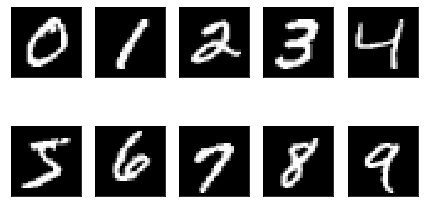

In [5]:
fig,ax=plt.subplots(2,5,True,True)
ax=ax.flatten()
for i in range(10):
    matchlist=[i for i , x in enumerate(y==i) if x]
    img=X[matchlist[0]].reshape(28,28) 
    ax[i].imshow(img, cmap='gray', interpolation='none')

    
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### Train a Random Forest classifier using the training data and evaluate how long it takes to train.

In [6]:
X_validate,X_train,X_test,y_validate,y_train,y_test=X[:6000],X[6000:60000],X[60000:],y[:6000],y[6000:60000],y[60000:]

In [7]:
print(X_validate.shape,X_train.shape)

(6000, 784) (54000, 784)


In [28]:
startTime = datetime.now()
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
time=str(datetime.now() - startTime)
print("Time taken to run the script in sec for training =" + time)

Time taken to run the script in sec for training =0:01:08.836885


In [29]:
startTime = datetime.now()
prediction_validation = clf.predict(X_validate)
print("Time taken to run the script in sec for validating =" + str(datetime.now() - startTime))

Time taken to run the script in sec for validating =0:00:00.470741


Confusion Matrix for Validation Set:-


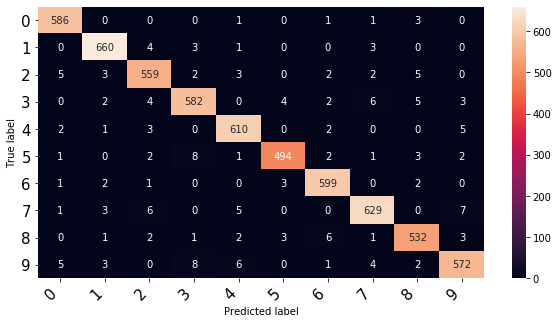

In [10]:
conf_matrix=confusion_matrix(y_validate,prediction_validation)
print("Confusion Matrix for Validation Set:-")
plt.figure(figsize=(10,5))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Test the classifier with the testing data and generate a confusion matrix and compute the overall accuracy.

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



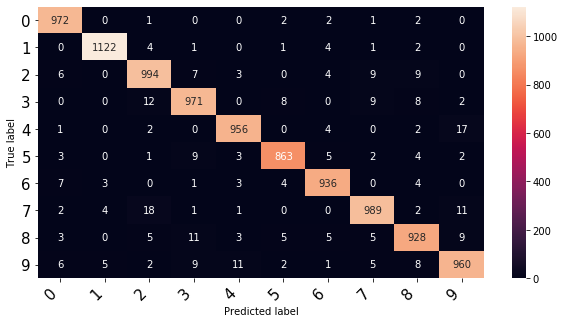

Predicted Accuracy:-  96.91


In [11]:
predicted_test = clf.predict(X_test)
len(predicted_test)
#correct_prediction=
conf_matrix=confusion_matrix(y_test,predicted_test)
print ("Classification Report")
print(classification_report(y_test, predicted_test))
prediction_test=0
for i in range(len(y_test)):
    if predicted_test[i]==y_test[i]:
        prediction_test+=1

plt.figure(figsize=(10,5))



class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
test_predicated=prediction_test/len(y_test)
print("Predicted Accuracy:- ",test_predicated*100)


### Use PCA to reduce the dataset’s dimensionality, using explained variance ratio’s of 95%, 90%,and 85%, respectively 

#### explained variance ratio’s of 95%

In [12]:
pca = PCA(n_components = 0.95)
X_reduced_95 = pca.fit_transform(X)
X_reduced_95

array([[ 0.95886475, -2.48026544, -0.40103397, ...,  0.27229047,
        -0.11157456,  0.16770762],
       [ 7.92544316, -2.27422448,  4.51859408, ...,  0.18728505,
        -0.05131636, -0.19531589],
       [-0.46271331,  3.0878231 , -1.27057399, ..., -0.04206139,
         0.43137418, -0.75869781],
       ...,
       [-2.12946677,  4.62806667,  2.6774029 , ..., -0.34319331,
         0.28064439,  0.3918912 ],
       [-2.43313587, -0.91550707,  4.98603919, ..., -0.17147807,
         0.16001198, -0.33476686],
       [ 8.30480099, -0.65405912,  5.73601713, ...,  0.32335953,
        -0.15727111, -0.39155779]])

#### explained variance ratio’s of 90% 

In [13]:
pca = PCA(n_components = 0.9)
X_reduced_90 = pca.fit_transform(X)
X_reduced_90

array([[ 0.95886475, -2.48026544, -0.40103397, ..., -0.23501442,
        -0.16306978, -1.16405597],
       [ 7.92544316, -2.27422448,  4.51859408, ..., -0.18486625,
        -0.46952999, -0.11339466],
       [-0.46271331,  3.0878231 , -1.27057399, ...,  0.35515999,
         0.02484516,  0.1944847 ],
       ...,
       [-2.12946677,  4.62806667,  2.6774029 , ..., -0.41291547,
        -0.9707839 , -0.27184326],
       [-2.43313587, -0.91550707,  4.98603919, ..., -0.5048908 ,
         0.06723698,  0.09509762],
       [ 8.30480099, -0.65405912,  5.73601713, ..., -0.04691084,
        -0.09452116, -0.36051829]])

#### explained variance ratio’s of 90% 

In [14]:
pca = PCA(n_components = 0.85)
X_reduced_85 = pca.fit_transform(X)
X_reduced_85

array([[ 0.95886475, -2.48026544, -0.40103397, ..., -0.43339904,
        -0.58028446, -1.02099655],
       [ 7.92544316, -2.27422448,  4.51859408, ..., -0.01599301,
        -0.27782503,  0.24383635],
       [-0.46271331,  3.0878231 , -1.27057399, ...,  1.09043208,
         0.42241997, -0.70429776],
       ...,
       [-2.12946677,  4.62806667,  2.6774029 , ...,  0.10976085,
        -0.36632789, -0.77236298],
       [-2.43313587, -0.91550707,  4.98603919, ...,  0.25490986,
         0.20624941,  0.79659477],
       [ 8.30480099, -0.65405912,  5.73601713, ...,  1.70935971,
         1.12473176, -1.43727484]])

### Train Random Forest classifiers using the dimensionally-reduced data and evaluate how long it takes to train. Discuss how the explained variance ratio influences training data, along with a comparison to the initial training time. 

In [15]:
X95_validate,X95_train,X95_test=X_reduced_95[:6000],X_reduced_95[6000:60000],X_reduced_95[60000:]
X90_validate,X90_train,X90_test=X_reduced_90[:6000],X_reduced_90[6000:60000],X_reduced_90[60000:]
X85_validate,X85_train,X85_test=X_reduced_85[:6000],X_reduced_85[6000:60000],X_reduced_85[60000:]

In [30]:
startTime = datetime.now()
clf95=RandomForestClassifier()
clf95.fit(X95_train,y_train)
time95=str(datetime.now() - startTime)
print("Time taken to run the script in sec for training explained variance ratio’s of 95%=" + time95)

Time taken to run the script in sec for training explained variance ratio’s of 95%=0:02:51.751149


In [31]:
startTime = datetime.now()
prediction_validation95 = clf95.predict(X95_validate)
print("Time taken to run the script in sec till validating explained variance ratio’s of 95% =" + str(datetime.now() - startTime))

Time taken to run the script in sec till validating explained variance ratio’s of 95% =0:00:00.681177


Confusion Matrix for Validation Set:-


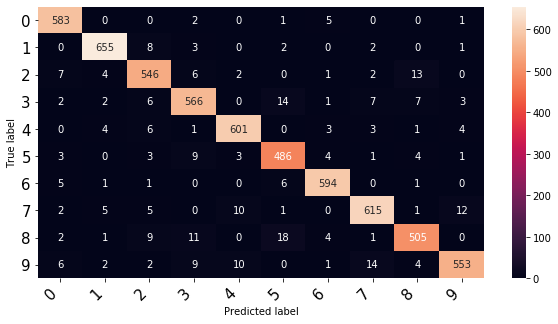

In [18]:
conf_matrix=confusion_matrix(y_validate,prediction_validation95)
print("Confusion Matrix for Validation Set:-")
plt.figure(figsize=(10,5))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
startTime = datetime.now()
clf90=RandomForestClassifier()
clf90.fit(X90_train,y_train)
time90=str(datetime.now() - startTime)
print("Time taken to run the script in sec for training explained variance ratio’s of 90%  =" + time90)

Time taken to run the script in sec till training =0:02:47.745954


In [20]:
startTime = datetime.now()
prediction_validation90 = clf90.predict(X90_validate)
print("Time taken to run the script in sec for validating explained variance ratio’s of 90% =" + str(datetime.now() - startTime))

Time taken to run the script in sec till validating =0:00:00.402533


Confusion Matrix for Validation Set:-


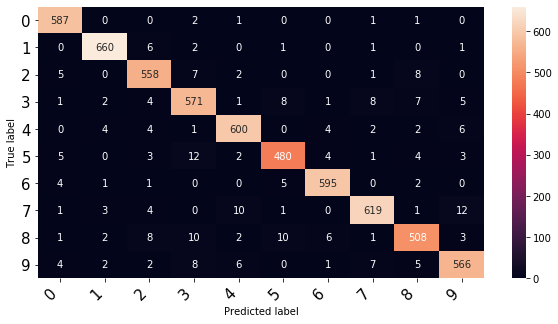

In [21]:
conf_matrix=confusion_matrix(y_validate,prediction_validation90)
print("Confusion Matrix for Validation Set:-")
plt.figure(figsize=(10,5))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
startTime = datetime.now()
clf85=RandomForestClassifier()
clf85.fit(X85_train,y_train)
time85=str(datetime.now() - startTime)
print("Time taken to run the script in sec for training explained variance ratio’s of 85% =" + time85)

Time taken to run the script in sec for training explained variance ratio’s of 85% =0:01:30.728333


In [33]:
startTime = datetime.now()
prediction_validation85 = clf85.predict(X85_validate)
print("Time taken to run the script in sec for validating explained variance ratio’s of 85% =" + str(datetime.now() - startTime))

Time taken to run the script in sec for validating explained variance ratio’s of 85% =0:00:00.340089


Confusion Matrix for Validation Set:-


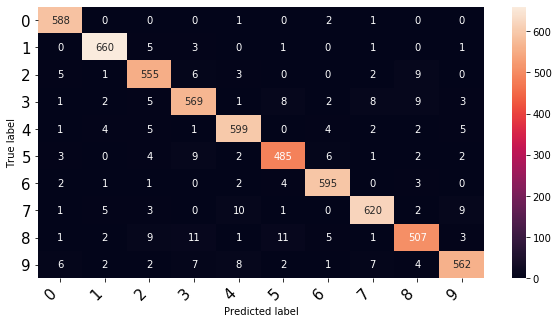

In [24]:
conf_matrix=confusion_matrix(y_validate,prediction_validation85)
print("Confusion Matrix for Validation Set:-")
plt.figure(figsize=(10,5))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### After applying the Dimension reduction, we see that the training time has increased. Before Dimension Reduction, we have the training time of 1 min 10 seconds. After applying PCA for 3 different variance ratio, the training time has doubled for 95% and 90% variance ratio. There training times are 2 min 51 seconds and 2 min 47 seconds respectively. For 85%, the training time is 1 min 30 seconds, which is near to the training time without PCA.
#### From the above training times, we can see that as we apply PCA the training time increases accordingly to the explained variance ratio. The more the variance ratio more the training time. This means the explained variance ratio is direcly proportional to training time. 
####  PCA dimension reduction takes nearly twice the training time then random forest because some complex features might be preserved which can lead to more training time.

### Evaluate the classifiers using the testing set, generating the confusion matrices and overall accuracy, for each case. Discuss the performance differences. 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.91      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



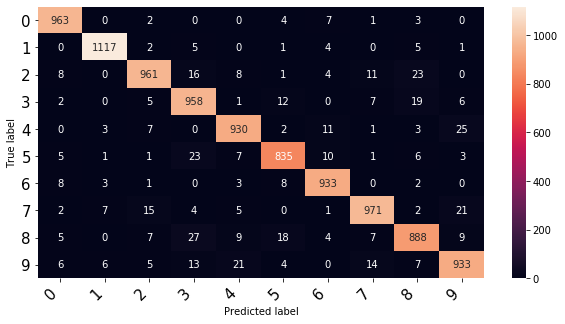

Predicted Accuracy:-  94.89


In [25]:
predicted95_test = clf95.predict(X95_test)
conf_matrix=confusion_matrix(y_test,predicted95_test)
print ("Classification Report")
print(classification_report(y_test, predicted95_test))
prediction_test=0
for i in range(len(y_test)):
    if predicted95_test[i]==y_test[i]:
        prediction_test+=1

plt.figure(figsize=(10,5))



class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
test_predicated=prediction_test/len(y_test)
print("Predicted Accuracy:- ",test_predicated*100)


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.96      0.98      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.91      0.93       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



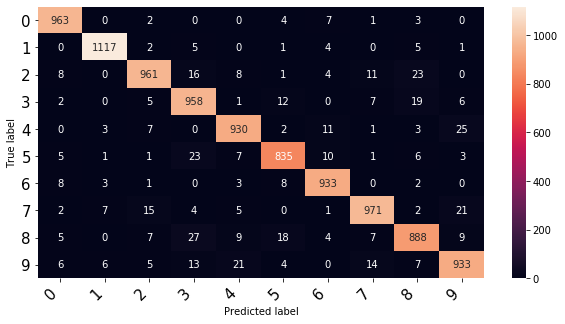

Predicted Accuracy:-  95.11


In [26]:
predicted90_test = clf90.predict(X90_test)
conf_matrix=confusion_matrix(y_test,predicted95_test)
print ("Classification Report")
print(classification_report(y_test, predicted90_test))
prediction_test=0
for i in range(len(y_test)):
    if predicted90_test[i]==y_test[i]:
        prediction_test+=1

plt.figure(figsize=(10,5))



class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
test_predicated=prediction_test/len(y_test)
print("Predicted Accuracy:- ",test_predicated*100)


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.95      0.94       892
           6       0.96      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



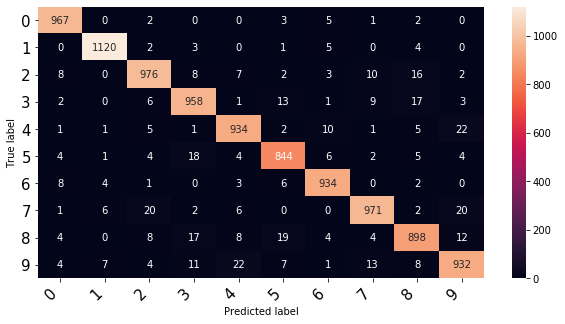

Predicted Accuracy:-  95.34


In [27]:
predicted85_test = clf85.predict(X85_test)
conf_matrix=confusion_matrix(y_test,predicted85_test)
print ("Classification Report")
print(classification_report(y_test, predicted85_test))
prediction_test=0
for i in range(len(y_test)):
    if predicted85_test[i]==y_test[i]:
        prediction_test+=1

plt.figure(figsize=(10,5))



class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
test_predicated=prediction_test/len(y_test)
print("Predicted Accuracy:- ",test_predicated*100)


### SUMMARY:-
#### We have trained and tested the MNIST dataset using random forest classifiers and with PCA dimension reduction. 
#### The accuracy of Random Forest classifier without Dimension Reduction was nearly 97% and the Time taken to train the dataset was nearly 1 minute 10 seconds.
#### We then applied PCA dimension reduction for 3 different  variance ratios:-

#### For 95%,We get The Accuracy is 94.89% and the time taken to train the dataset is 2 minutes 51 seconds.

#### For 90%,We get The Accuracy is 95.11% and the time taken to train the dataset is 2 minutes 47 seconds.

#### For 85%,We get The Accuracy is 95.34% and the time taken to train the dataset is 1 minutes 31 seconds.

### REFERENCES:-
#### Chapter 8 of Hands on machine learning book